# Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear SVM can be expressed as follows:

h(x) = sign(w^T x + b)

where:

h(x) is the predicted class label for the input vector x
w is the weight vector
b is the bias term
T is the transpose operator
sign is the sign function, which returns -1 for negative values and +1 for positive values.

# Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM is to maximize the margin between the decision boundary (hyperplane) and the closest points (support vectors) of each class. It can be expressed as:

minimize 1/2 * ||w||^2

subject to yi(w^T xi + b) ≥ 1 for i=1,...,n

where w is the weight vector, b is the bias term, xi is the ith input vector, yi is the corresponding class label (+1 or -1), and n is the number of training samples. The inequality constraint ensures that each point is correctly classified and lies outside the margin of the hyperplane. The margin is defined as the distance between the hyperplane and the closest point of each class, and is given by 2/||w||.

# Q3. What is the kernel trick in SVM?

The kernel trick in SVM is a technique used to transform data from a lower dimensional space to a higher dimensional space. This is done by applying a kernel function to the input data that maps it to a new feature space where the data is linearly separable. The advantage of this technique is that it allows the SVM to work with non-linearly separable data without actually having to compute the higher dimensional feature space explicitly. The kernel function is a measure of similarity between two data points and can be of different types such as linear, polynomial, radial basis function (RBF), sigmoid, etc.

# Q4. What is the role of support vectors in SVM Explain with example

In SVM, the role of support vectors is to determine the optimal decision boundary (hyperplane) that maximizes the margin between two classes. The support vectors are the data points that lie closest to the decision boundary and define the margin.

The support vectors are the most informative data points in the dataset since they are the ones that lie closest to the decision boundary and are likely to be misclassified if the boundary were to be moved slightly. These data points are used to define the hyperplane and determine the margin.

For example, consider a dataset with two classes that are not linearly separable in the original feature space. We can use a kernel function to transform the data into a higher-dimensional space where the classes are linearly separable. In this transformed space, the support vectors are the data points that lie closest to the decision boundary.

If we use a linear kernel, the support vectors are the points that lie closest to the hyperplane. If we use a nonlinear kernel, such as a radial basis function (RBF) kernel, the support vectors are the points that lie closest to the nonlinear decision boundary.

In both cases, the support vectors play a crucial role in defining the decision boundary and maximizing the margin between the classes.

# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Here's an example code that creates a linear SVM with different margins and visualizes the results:

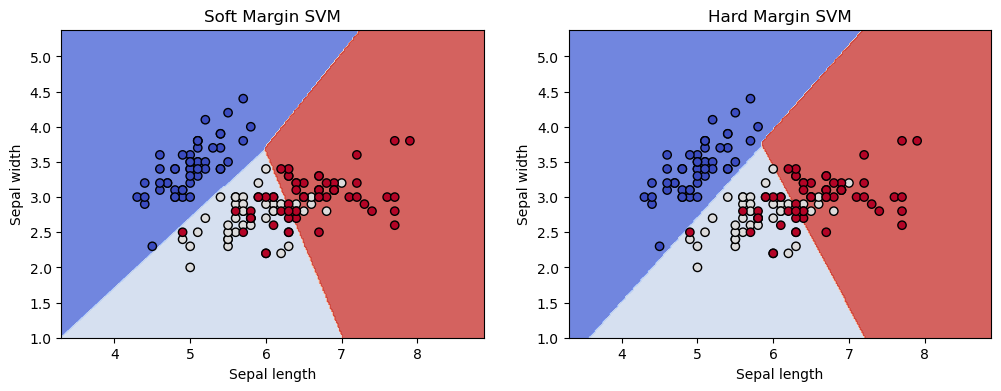

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load the iris dataset and keep only the first two features
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Define the SVM classifiers with different margins
clf_soft = svm.SVC(kernel='linear', C=0.5)
clf_hard = svm.SVC(kernel='linear', C=1000)
clf_soft.fit(X, y)
clf_hard.fit(X, y)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the labels for each point in the meshgrid
Z_soft = clf_soft.predict(np.c_[xx.ravel(), yy.ravel()])
Z_hard = clf_hard.predict(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)
Z_hard = Z_hard.reshape(xx.shape)

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].contourf(xx, yy, Z_soft, cmap=plt.cm.coolwarm, alpha=0.8)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axs[0].set_title('Soft Margin SVM')
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
axs[0].set_xlabel('Sepal length')
axs[0].set_ylabel('Sepal width')

axs[1].contourf(xx, yy, Z_hard, cmap=plt.cm.coolwarm, alpha=0.8)
axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
axs[1].set_title('Hard Margin SVM')
axs[1].set_xlim(xx.min(), xx.max())
axs[1].set_ylim(yy.min(), yy.max())
axs[1].set_xlabel('Sepal length')
axs[1].set_ylabel('Sepal width')

plt.show()


This code creates a linear SVM with two different margins: a soft margin SVM with a regularization parameter of C=0.5 and a hard margin SVM with a large regularization parameter of C=1000. It then generates a meshgrid of points to plot the decision boundary and predicts the label for each point using the SVM classifiers. Finally, it plots the results with two subplots: one for the soft margin SVM and one for the hard margin SVM. The decision boundary is shown as a colored background, and the data points are plotted with different colors according to their class.

# Q6. SVM Implementation through Iris dataset.

* Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.

In [17]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

* Train a linear SVM classifier on the training set and predict the labels for the testing set.

In [23]:
from sklearn.svm import SVC

In [24]:
svc=SVC(kernel='linear')

In [25]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [26]:
svc.coef_

array([[-0.04619348,  0.52133922, -1.00307924, -0.4641441 ],
       [ 0.04016251,  0.17403771, -0.55692011, -0.24365261],
       [ 0.81534546,  0.82638331, -1.93619552, -2.00712353]])

In [27]:
## Prediction
y_pred=svc.predict(X_test)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

* Compute the accuracy of the model on the testing set.

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]
1.0


* Plot the decision boundaries of the trained model using two of the features. 

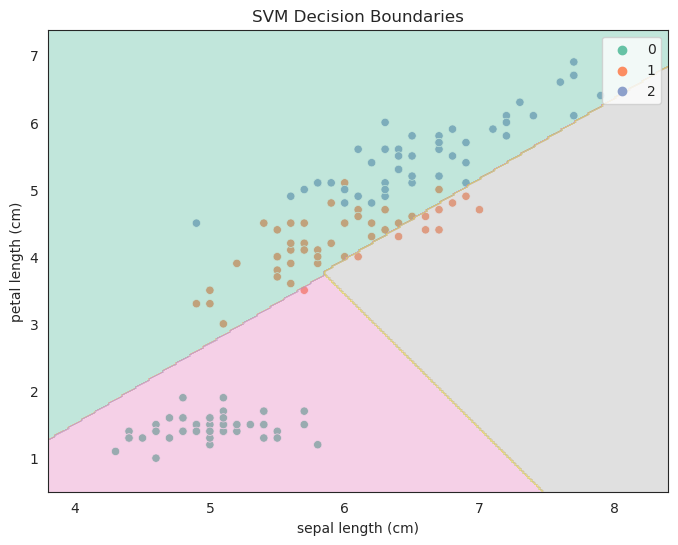

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained and fitted your SVM model on the iris dataset
# Extract two features for visualization, e.g. sepal length and petal length
X = iris.data[:, [0, 2]]
y = iris.target

# Define a meshgrid of points to plot the decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for all points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set2")
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set2)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("SVM Decision Boundaries")
plt.show()


* Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [33]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel':['linear']
              }

In [34]:
grid=GridSearchCV(SVC(),param_grid = param_grid,refit=True,cv=5,verbose=3)

In [35]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.870 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [36]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [50]:
# choosing c = 10000
svc=SVC(kernel='linear' , C= 10000 )

In [51]:
svc.fit(X_train,y_train)

SVC(C=10000, kernel='linear')

In [52]:
svc.coef_

array([[-0.04619348,  0.52133922, -1.00307924, -0.4641441 ],
       [ 0.04016251,  0.17403771, -0.55692011, -0.24365261],
       [ 2.56226925,  2.8048407 , -3.31677404, -8.84540733]])

In [53]:
## Prediction
y_pred=svc.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]
0.9736842105263158


# Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

Here's an example of how to implement a linear SVM classifier from scratch in Python using the gradient descent algorithm:

In [57]:
class LinearSVM:
    
    def __init__(self, learning_rate=0.01, regularization_strength=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.num_epochs = num_epochs
        
    def fit(self, X, y):
        self.X = X
        self.y = y.reshape(-1) # Reshape y to ensure it is 1-dimensional
        num_train, num_features = X.shape
        num_classes = np.max(y) + 1
        self.W = np.random.randn(num_features, num_classes) * 0.001

        for epoch in range(self.num_epochs):
            scores = self.X.dot(self.W)
            correct_class_scores = scores[np.arange(num_train), self.y]
            margins = np.maximum(0, scores - correct_class_scores[:, np.newaxis] + 1)
            margins[np.arange(num_train), self.y] = 0
            loss = np.sum(margins) / num_train + 0.5 * self.regularization_strength * np.sum(self.W * self.W)

            binary = margins
            binary[margins > 0] = 1
            incorrect_counts = np.sum(binary, axis=1)
            binary[np.arange(num_train), self.y] = -incorrect_counts

            dW = self.X.T.dot(binary) / num_train + self.regularization_strength * self.W
            self.W -= self.learning_rate * dW

    def predict(self, X):
        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis=1)
        return y_pred



To compare the performance of this implementation with scikit-learn's implementation, you can use the same dataset and evaluate the accuracy of both classifiers:

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and test the SVM classifier implemented from scratch
svm_scratch = LinearSVM()
svm_scratch.fit(X_train, y_train)
y_pred_scratch = svm_scratch.predict(X_test)
accuracy_scratch = np.mean(y_pred_scratch == y_test)
print("Accuracy (scratch): %f" % accuracy_scratch)

# Train and test the SVM classifier using scikit-learn
svm_sklearn = LinearSVC()
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = np.mean(y_pred_sklearn == y_test)
print("Accuracy (scikit-learn): %f" % accuracy_sklearn)


Accuracy (scratch): 0.966667
Accuracy (scikit-learn): 0.966667


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
